<a href="https://colab.research.google.com/github/botkin92/Data_analysis_algorithms/blob/lesson_2/lesson_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [3]:
datar, target = datasets.make_regression(n_samples=1000, n_features=2)

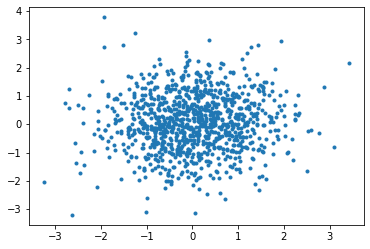

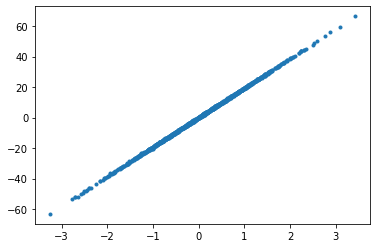

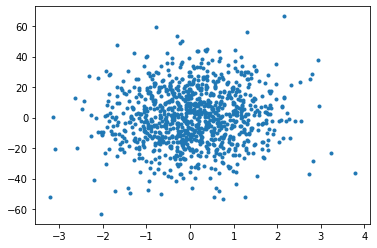

In [4]:
plt.plot(datar[:,0],datar[:,1],'.')
plt.show()
plt.plot(datar[:,0],target,'.')
plt.show()
plt.plot(datar[:,1],target,'.')
plt.show()

In [5]:
# разделим сгенерированные данные на две выборки: тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(datar, target, test_size=0.3)

In [6]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Реализация градиентного спуска:

In [7]:
# Общие параметры:
# шаг градиентного спуска
eta = 0.1
 
# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

In [8]:
# инициализируем начальный вектор весов
# w = np.zeros(2)
np.random.seed(1234)
w = np.random.randn(2)
new_w = w

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while (weight_dist > min_weight_dist) and (iter_num < max_iter):
    
    # новый вес w
    new_w = w - 2 * eta * np.dot(X_train.T, (np.dot(X_train, w) - y_train)) / y_train.shape[0]
    
    # оценка рассояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X_train, new_w, y_train))
    
    iter_num += 1
    w = new_w

    if iter_num % 10 == 0:
      print(f'Iteration #{iter_num}: W_new = {w}, MSE = {round(mserror(X_train, w, y_train),2)}')

w_list = np.array(w_list)

print(f'При использовании градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

Iteration #10: W_new = [17.2816411   0.53257642], MSE = 4.12
Iteration #20: W_new = [19.0859127   0.31941115], MSE = 0.06
Iteration #30: W_new = [19.28837319  0.25990202], MSE = 0.0
Iteration #40: W_new = [19.31187864  0.24995023], MSE = 0.0
Iteration #50: W_new = [19.31467489  0.2485149 ], MSE = 0.0
Iteration #60: W_new = [19.31501309  0.24832102], MSE = 0.0
Iteration #70: W_new = [19.31505445  0.24829571], MSE = 0.0
Iteration #80: W_new = [19.31505954  0.24829246], MSE = 0.0
Iteration #90: W_new = [19.31506017  0.24829205], MSE = 0.0
При использовании градиентного спуска функционал ошибки составляет 0.0


Реализация стохастического градиентного спуска:

In [9]:
# инициализируем начальный вектор весов
# w = np.zeros(2)
np.random.seed(1234)
w = np.random.randn(2)
new_w = w
 
# список векторов весов после каждой итерации
w_list_stoch = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_stoch = []
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0

# ход градиентного спуска
while (weight_dist > min_weight_dist) and (iter_num < max_iter):
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X_train.shape[0])
    
    # новый вес w
    new_w = w - 2 * eta * np.dot(X_train[train_ind].T, (np.dot(X_train[train_ind], w) - y_train[train_ind])) / y_train.shape[0]
    
    # оценка рассояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list_stoch.append(new_w.copy())
    errors_stoch.append(mserror(X_train, new_w, y_train))
    
    iter_num += 1
    w = new_w
    
    if iter_num % 1000 == 0:
      print(f'Iteration #{iter_num}: W_new = {w}, MSE = {round(mserror(X_train, w, y_train),2)}')

w_list_stoch = np.array(w_list_stoch)

print(f'При использовании стохастического градиентного спуска функционал ошибки составляет {round(errors_stoch[-1], 4)}')
print(f'Случайно сгенерированный индекс: {round(train_ind, 2)}; значения признаков и цели: {X_train[train_ind]}, {y_train[train_ind]}')

Iteration #1000: W_new = [ 5.01921209 -0.64951223], MSE = 207.54
Iteration #2000: W_new = [8.35138894 0.05432399], MSE = 120.64
Iteration #3000: W_new = [11.10960361  0.39275129], MSE = 67.15
Iteration #4000: W_new = [13.19927888  0.56982018], MSE = 37.17
Iteration #5000: W_new = [14.67133033  0.6491653 ], MSE = 21.41
Iteration #6000: W_new = [15.82668433  0.62182221], MSE = 12.09
Iteration #7000: W_new = [16.65843988  0.60306051], MSE = 7.03
Iteration #8000: W_new = [17.30855271  0.55882311], MSE = 4.02
Iteration #9000: W_new = [17.79996116  0.53001547], MSE = 2.31
Iteration #10000: W_new = [18.16653543  0.4750673 ], MSE = 1.33
Iteration #11000: W_new = [18.43794885  0.43371226], MSE = 0.78
Iteration #12000: W_new = [18.64957654  0.404605  ], MSE = 0.45
Iteration #13000: W_new = [18.80807301  0.37003322], MSE = 0.26
При использовании стохастического градиентного спуска функционал ошибки составляет 0.1651
Случайно сгенерированный индекс: 604; значения признаков и цели: [0.09186814 0.35

Text(0, 0.5, 'MSE')

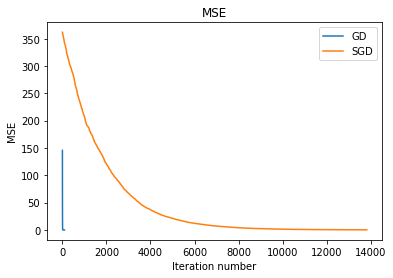

In [10]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)-1), errors[1:], label = 'GD')
plt.plot(range(len(errors_stoch)-1), errors_stoch[1:], label = 'SGD')
plt.title('MSE')

plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Вывод: скорость сходимости градиентного спуска значительно выше, чем у стохастического градиентного спуска. Но при этом сложность алгоритма градиентного спуска существенно выше. 

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [11]:
# инициализируем начальный вектор весов
# w = np.zeros(2)
np.random.seed(1234)
w = np.random.randn(2)
new_w = w

# список векторов весов после каждой итерации
w_list_reg = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_reg = []
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0

# коэффициент регуляризации
lamb = 0.1 

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X_train.shape[0])
    
    # оценка рассояния по эвклиду между старым и новым состоянием w
    new_w = w - 2 * eta * (np.dot(X_train[train_ind].T, (np.dot(X_train[train_ind], w) - y_train[train_ind])) + lamb * w) / y_train.shape[0]
     
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list_reg.append(new_w.copy())
    errors_reg.append(mserror(X_train, new_w, y_train))

    iter_num += 1
    w = new_w
    
w_list_reg = np.array(w_list_reg)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_reg[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 3.2488


Text(0, 0.5, 'MSE')

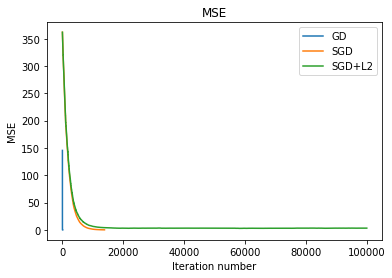

In [12]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)-1), errors[1:], label = 'GD')
plt.plot(range(len(errors_stoch)-1), errors_stoch[1:], label = 'SGD')
plt.plot(range(len(errors_reg)-1), errors_reg[1:], label = 'SGD+L2')
plt.title('MSE')

plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Регуляризация позволяет бороться с переобучением, а также исключить признаки с малыми весами. Но в условиях синтетических данных эффект переобучения не наблюдается. Данный пример получился не показательный.

In [13]:
predict_MSE_GD = mserror(X_test, w_list[-1], y_test)
predict_MSE_SGD = mserror(X_test, w_list_stoch[-1], y_test)
predict_MSE_SGDL2 = mserror(X_test, w_list_reg[-1], y_test)
predict_MSE_GD, predict_MSE_SGD, predict_MSE_SGDL2

(1.2587446249282805e-15, 0.15146760147752247, 2.889864714119215)